# **Assessment 2**

For our second assessment, we will be looking at sequential weather data. The data contains a number of relevant weather variables, recorded daily for a European city during a period of four decades.

However, this dataset has been corrupted, and some of the daily measurements are now missing. The goal of this assessment is to develop a neural network architecture that can recover the missing measurements!

<br>

---

<br>

The dataset has been saved as `.csv` files and has been separated into a `training_set/` folder and a `test_set.csv` file. The `training_set/` contains data for three of the four decades, separated in one individual file per decade:

- `training_set_0.csv` contains corrupted data for the first decade; `training_set_0_nogaps.csv` contains the same data before it was corrupted.
- `training_set_1.csv` contains corrupted data for the second decade; `training_set_1_nogaps.csv` contains the same data before it was corrupted.
- `training_set_2.csv` contains corrupted data for the third decade; `training_set_2_nogaps.csv` contains the same data before it was corrupted.

The `test_set.csv` file contains the remaining decade; this data is corrupted and contains gaps, but we have lost access to the data before corruption.

The architecture that you design in this assessment should use the data contained inside the `training_set` in order to recover the missing information in the data in `test_set.csv`. Note that decades `0`, `1`, and `2` are not necessarily consecutive.

Inside each of the `.csv` files, you will find the following columns:

- `date`
- `cloud_cover`
- `sunshine`
- `global_radiation`
- `max_temp`
- `mean_temp`
- `min_temp`
- `precipitation`
- `pressure`

<br>

All answers to the assessment should be contained within the structure below, but you are free to add new code and text cells as required to your answers. Read the text for each question and follow the instructions carefully. Answers that do not follow this structure will not be marked. **Do NOT change the name of this file.**

Please, **make sure to execute all your cells and save the result of the execution**. We will only mark cells that have been executed and will not execute any cells ourselves.

<br>

---

<br>

<br><br>

## **Question 1**  (25%)

Load the training and test datasets. Then, use the space below to present the following set of figures:

1. Using line plots, show the different variables in each dataset, both before and after corruption. Choose a single decade to plot, and plot the first 365 days of data. Plot the time series for each variable in an independent axis window. Make sure the axis windows are sized appropriately so that trends and corruption in the variables can be easily observed.
2. Plot a histogram for each variable in each dataset, across all decades, both before and after corruption.

<br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Load the training dataset

There are three training subsets , which are 'training_set_0','training_set_1' and 'training_set_2'. These are the corrupted data. And there are also three csv files opposite them, which are 'training_set_0_nogaps','training_set_1_nogaps' and 'training_set_2_nogaps'. These are the uncorrupted data.

First I read all the uncorrupted data and concatenated them into one df called train_uncorrupted_data.

In [3]:
# Set the path to the folder of training datasets
train_path = '/content/drive/My Drive/dl_assessment2/training_set/'

# Get the list of all files in the folder
keyword = 'nogaps'
train_uncorrupted_file = sorted([file for file in os.listdir(train_path) if keyword in file])
train_corrupted_file = sorted([file for file in os.listdir(train_path) if keyword not in file])

# Create an empty list to store all DataFrames
train_uncorrupted=[]


for file in train_uncorrupted_file:
    file_path = os.path.join(train_path, file)  # Create the full path to the file

    df = pd.read_csv(file_path)  # Read the file

    train_uncorrupted.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames in the list
train_uncorrupted_data = pd.concat(train_uncorrupted, ignore_index=True)

# Display the uncorrupted data
train_uncorrupted_data

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0         0          4.0       0.2              10.6       2.1       -1.3   
1         1          2.0       6.7              58.8      11.4       -2.1   
2         2          7.9      -0.0               5.7       9.6        3.0   
3         3          4.9       4.1              41.1       8.0        4.7   
4         4          3.9       1.3              19.5       8.4        4.8   
...     ...          ...       ...               ...       ...        ...   
10949  3646          6.8      -0.0              12.4       8.1        5.9   
10950  3647          8.0       0.0               6.5      10.3        7.6   
10951  3648          7.9       0.0              13.7      10.0        8.0   
10952  3649          6.0       2.1              33.1      11.9        8.4   
10953  3650          0.0       3.4              39.5       9.3        6.5   

       min_temp  precipitation  pressure  
0          -4.2            0.0  101282.7  
1          -6.0            0.2  102455.7  
2          -5.8            9.9  101920.4  
3           0.8            0.0  100441.5  
4           1.7            0.0  100625.2  
...         ...            ...       ...  
10949       1.3            2.5  101671.8  
10950       6.5            0.0  102951.5  
10951       6.6            0.1  103596.6  
10952       7.7            0.3  103409.4  
10953       1.1            0.0  102927.7  

[10954 rows x 9 columns]

Then I read all the corrupted data and concatenated them into one df called train_corrupted_data.

In [4]:
# Create an empty list to store all DataFrames
train_corrupted=[]

for file in train_corrupted_file:
    file_path = os.path.join(train_path, file)  # Create the full path to the file

    df = pd.read_csv(file_path)  # Read the file

    train_corrupted.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames in the list
train_corrupted_data = pd.concat(train_corrupted, ignore_index=True)

# Display the corrupted data
train_corrupted_data

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0         0          4.0       0.2              10.6       2.1       -1.3   
1         1          2.0       6.7              58.8      11.4       -2.1   
2         2          7.9      -0.0               5.7       9.6        NaN   
3         3          4.9       4.1              41.1       8.0        NaN   
4         4          3.9       1.3              19.5       8.4        NaN   
...     ...          ...       ...               ...       ...        ...   
10949  3646          6.8      -0.0              12.4       8.1        5.9   
10950  3647          8.0       0.0               6.5      10.3        7.6   
10951  3648          7.9       0.0              13.7      10.0        8.0   
10952  3649          6.0       2.1              33.1      11.9        8.4   
10953  3650          0.0       3.4              39.5       9.3        6.5   

       min_temp  precipitation  pressure  
0          -4.2            0.0  101282.7  
1          -6.0            0.2  102455.7  
2          -5.8            9.9  101920.4  
3           0.8            0.0  100441.5  
4           1.7            0.0  100625.2  
...         ...            ...       ...  
10949       1.3            2.5  101671.8  
10950       6.5            0.0  102951.5  
10951       6.6            0.1  103596.6  
10952       7.7            0.3  103409.4  
10953       1.1            0.0  102927.7  

[10954 rows x 9 columns]

## Load the test dataset

In [5]:
# Set the path of test datasets
test_path = '/content/drive/My Drive/dl_assessment2/test_set.csv'

# Read the test set
test_set = pd.read_csv(test_path)

# Display the test set
test_set

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0        0          7.1       0.5              15.5      11.1        7.4   
1        1          7.1       0.8              19.4      11.0        7.7   
2        2          8.0       0.0               8.8       9.3        9.2   
3        3          4.9       2.6              30.8      11.6        6.9   
4        4          NaN       2.0              25.0      10.5        6.1   
...    ...          ...       ...               ...       ...        ...   
3647  3647          4.1       1.6              32.2       7.8        NaN   
3648  3648          2.0       1.9              24.1       5.3        NaN   
3649  3649          2.2       3.8              34.4       4.8        NaN   
3650  3650          7.9       0.0               7.5       5.1        NaN   
3651  3651          8.1       0.1              17.7       4.2        NaN   

      min_temp  precipitation  pressure  
0          4.6            0.0  102472.1  
1          5.2            0.0  102547.2  
2          7.6            6.1  101847.4  
3          4.3            0.0  101370.4  
4          1.9            0.7  101383.3  
...        ...            ...       ...  
3647       2.0            0.2  100024.1  
3648       4.8            0.0   99900.1  
3649      -2.3            0.7  100411.3  
3650      -1.0           12.7   99516.7  
3651       4.0            3.6   99200.8  

[3652 rows x 9 columns]

## Plot1

### Line plot of training dataset

Since I concatenated the corrupted and uncorrupted data from the training dataset into two separate tables. Therefore, for the first 365 days of a single decade, I directly took the first 365 rows of data from the two tables to create a line plot.

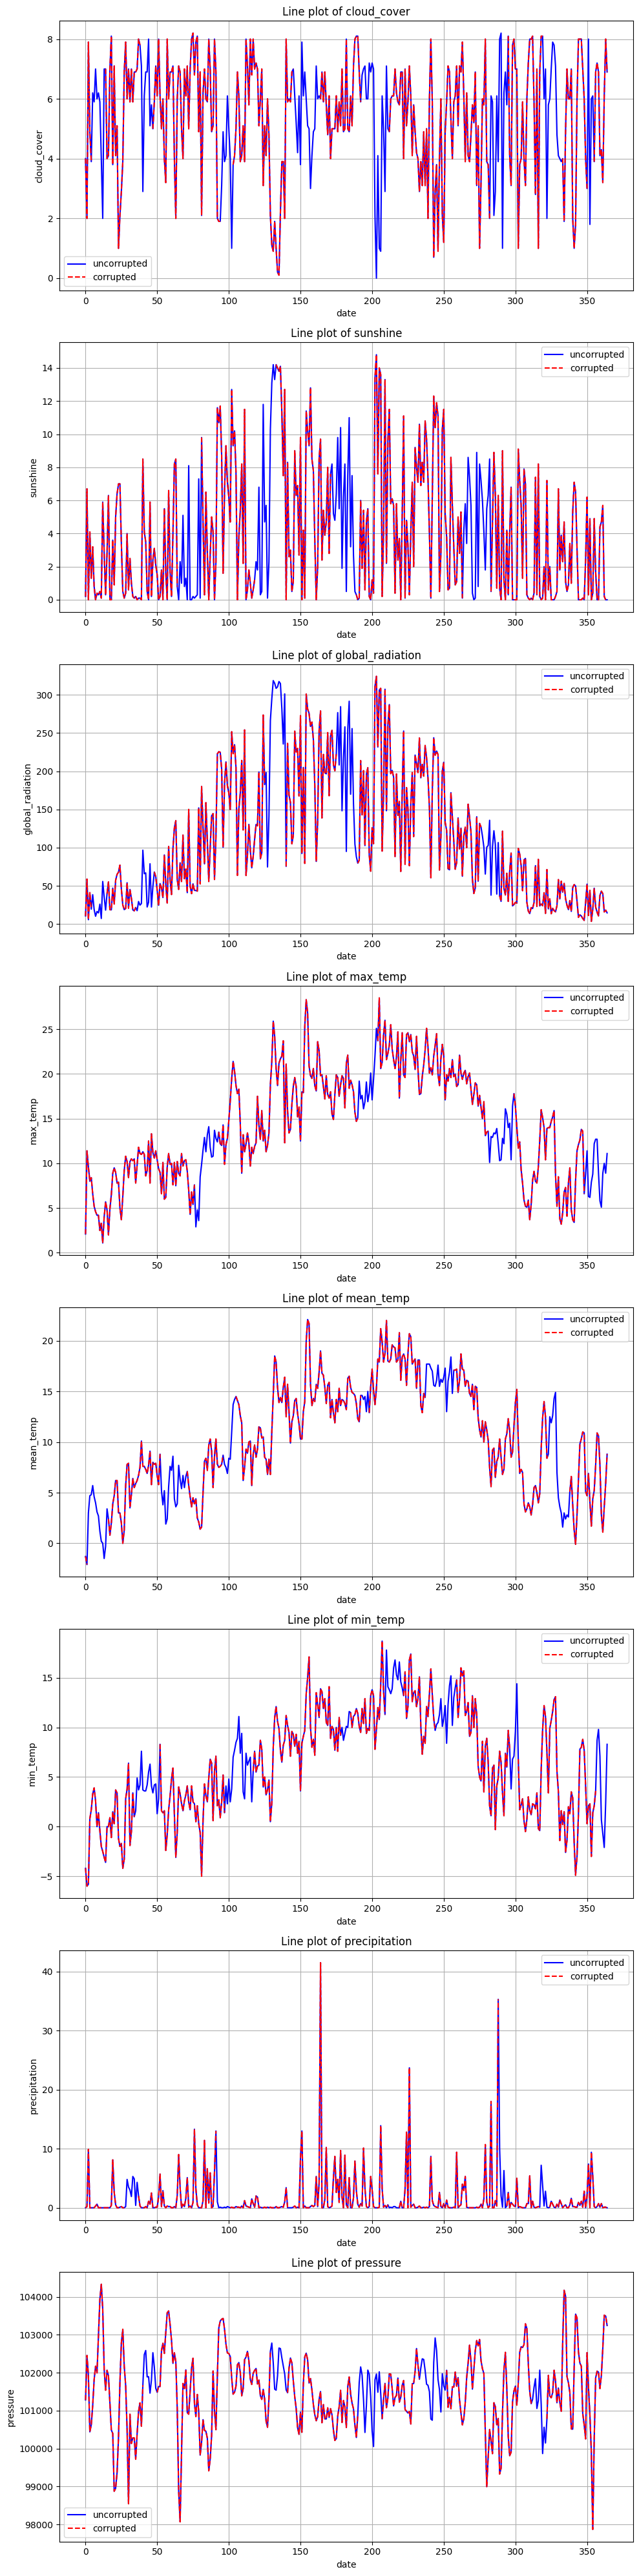

In [6]:
# List of variables to plot (excluding the column 'date')
variables = train_uncorrupted_data.columns[1:]

# Select the first 365 days of a single decade
train_uncorrupted_365 = train_uncorrupted_data.head(365)
train_corrupted_365 = train_corrupted_data.head(365)

# Plot time series for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    axes[i].plot(train_uncorrupted_365["date"], train_uncorrupted_365[var], label=f"uncorrupted", color="blue") # Plot the uncorrupted data
    axes[i].plot(train_corrupted_365["date"], train_corrupted_365[var], label=f"corrupted", color="red", linestyle="--") # Plot the corrupted data
    axes[i].set_title(f"Line plot of {var}") # Set the title of the plot
    axes[i].set_ylabel(var) # Set the label of the y-axis
    axes[i].set_xlabel("date") # Set the label of the x-axis
    axes[i].grid(True)
    axes[i].legend()

# Display the plot
plt.tight_layout()
plt.show()

### Line plot of test dataset

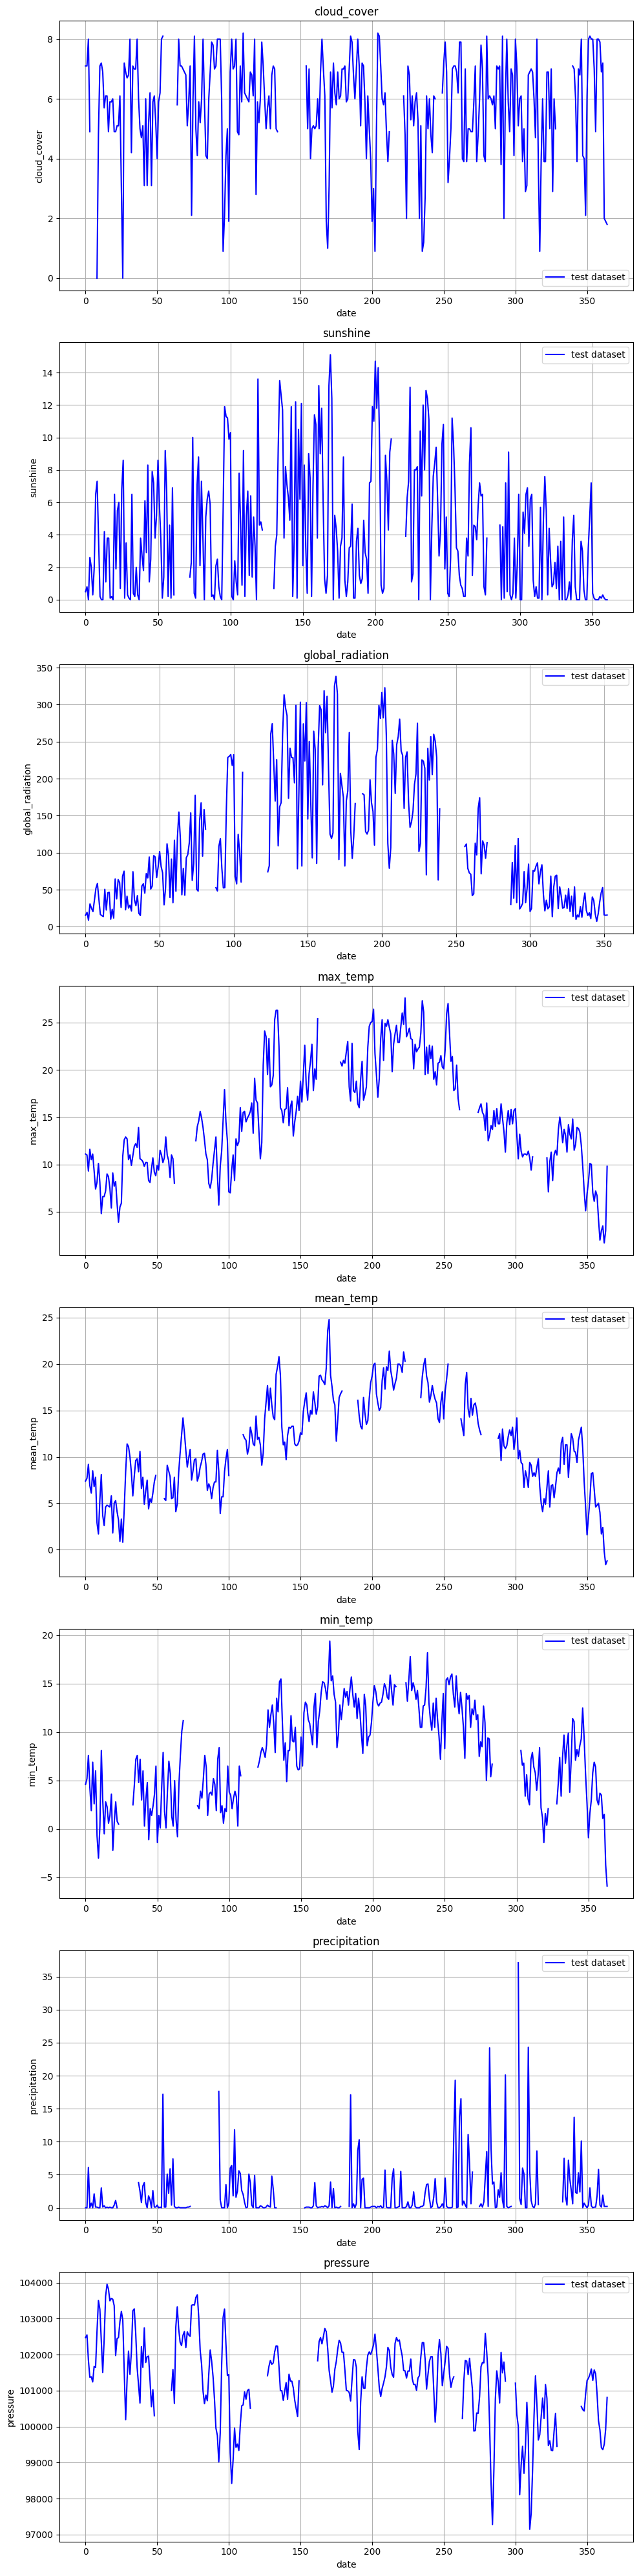

In [7]:
# Select the first 365 days of the test dataset
test_set_365 = test_set.head(365)

# Plot time series for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    axes[i].plot(test_set_365["date"], test_set_365[var],label=f"test dataset",color="blue") # Plot the test dataset
    axes[i].set_title(var) # Set the title of the plot
    axes[i].set_ylabel(var) # Set the label of the y-axis
    axes[i].set_xlabel("date") # Set the label of the x-axis
    axes[i].grid(True)
    axes[i].legend()

# Display the plot
plt.tight_layout()
plt.show()

## Plot2

### Histogram of traning dataset

In this part, as the task is to show the data from each of the 3 sub-training datasets, so I sliced and diced two large tables to get all sub datasets.

For the training_set_0

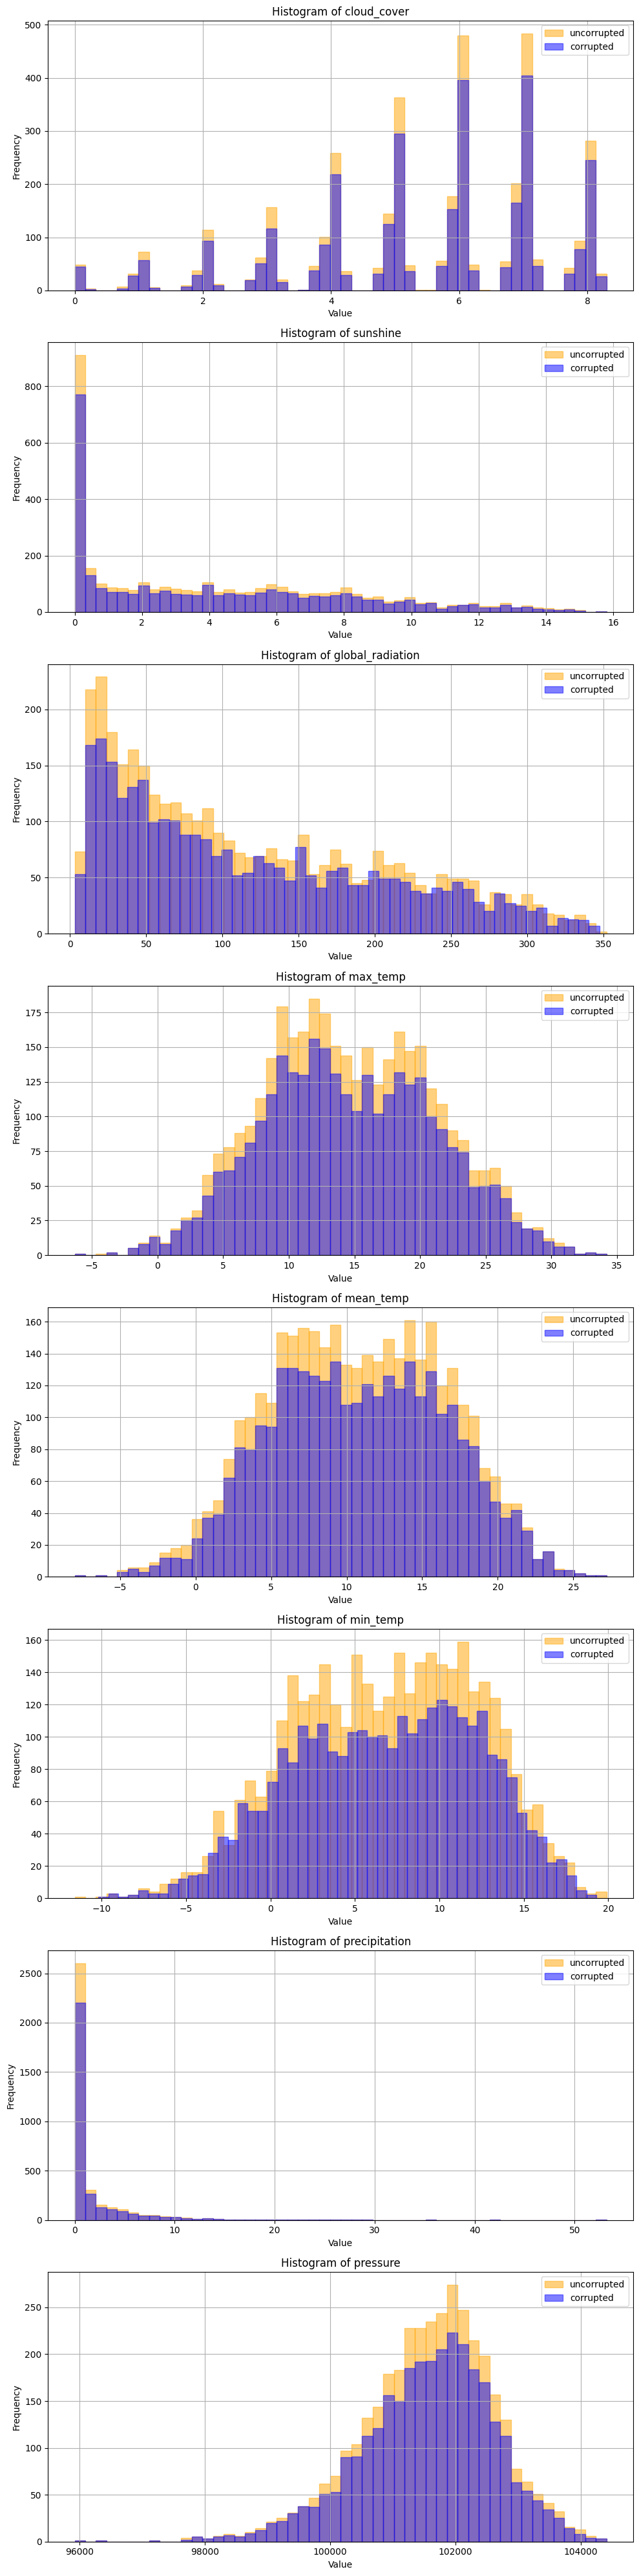

In [8]:
# Select the first 3652 rows of the dataframe to get the traing_set_0
train_uncorrupted_data1=train_uncorrupted_data.head(3652)
train_corrupted_data1=train_corrupted_data.head(3652)

# Plot time series for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    # Plot the uncorrupted data
    axes[i].hist(train_uncorrupted_data1[var], bins=50, alpha=0.5, label="uncorrupted", color="orange",edgecolor="orange")

    # Plot the corrupted data
    axes[i].hist(train_corrupted_data1[var], bins=50, alpha=0.5, label="corrupted", color="blue",edgecolor="blue")

    axes[i].set_title(f"Histogram of {var}") # Set the title of the plot
    axes[i].set_ylabel("Frequency") # Set the label of the y-axis
    axes[i].set_xlabel("Value") # Set the label of the x-axis
    axes[i].grid(True)
    axes[i].legend()

# Display the plot
plt.tight_layout()
plt.show()

For the training_set_1

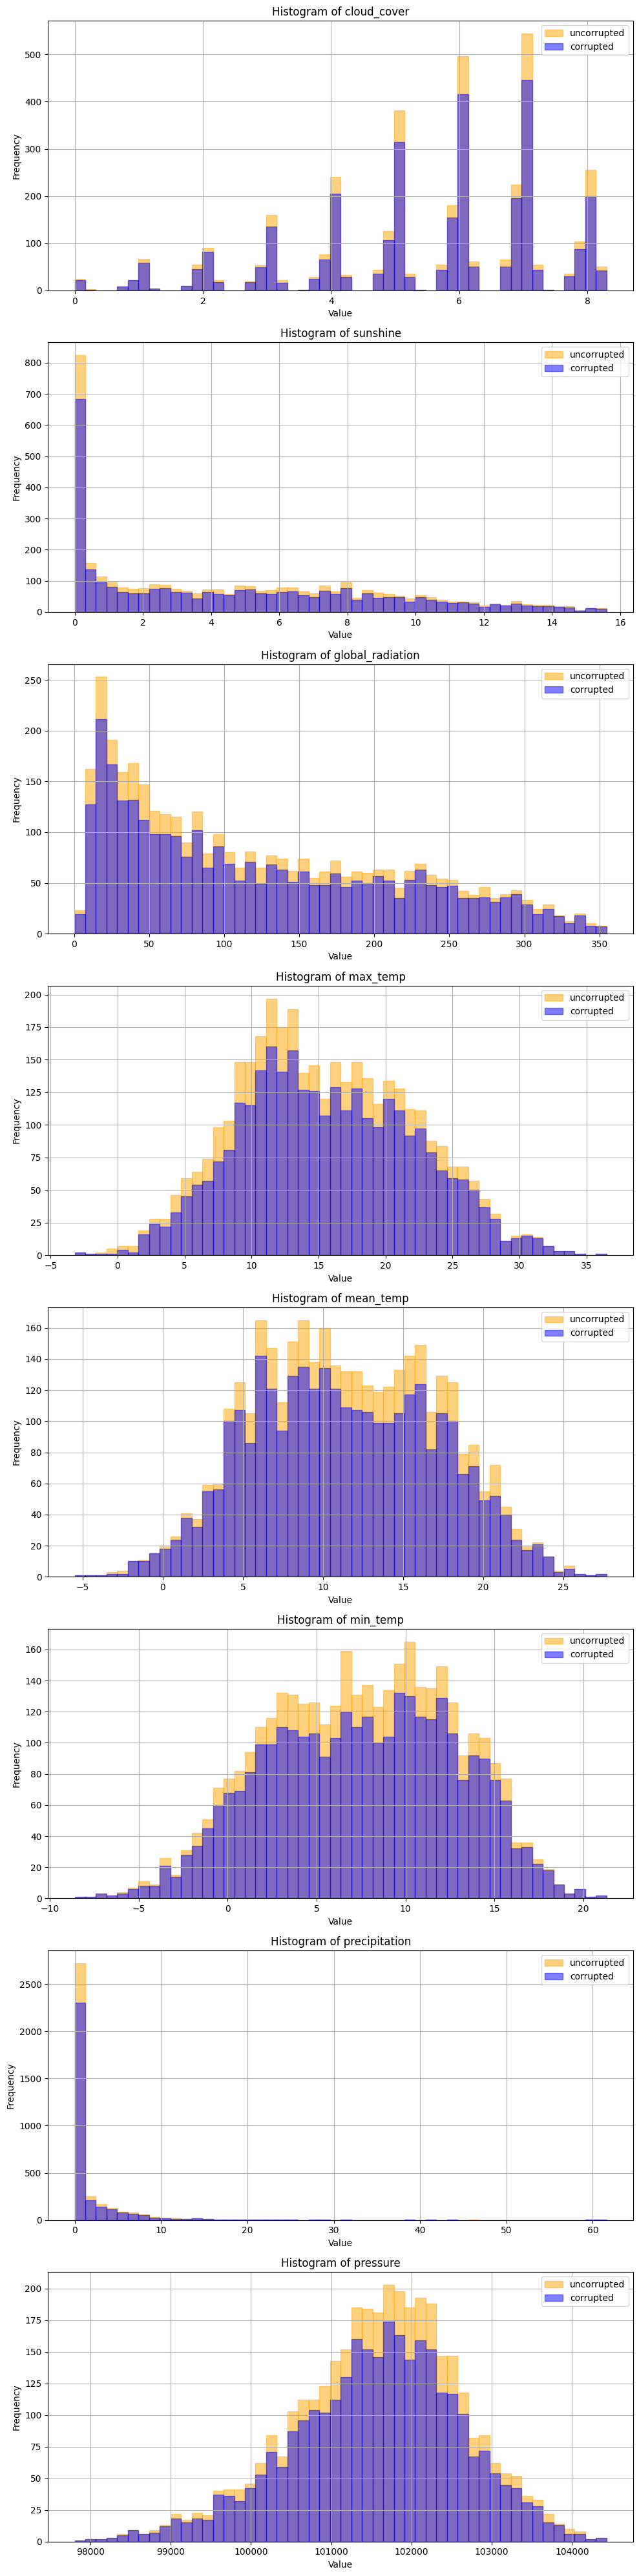

In [9]:
# Select the second 3652 rows of the dataframe to get the traing_set_1
train_uncorrupted_data2 = train_uncorrupted_data.iloc[3652:7303]
train_corrupted_data2 = train_corrupted_data.iloc[3652:7303]

# Plot time series for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    # Plot the uncorrupted data
    axes[i].hist(train_uncorrupted_data2[var], bins=50, alpha=0.5, label="uncorrupted", color="orange",edgecolor="orange")

    # Plot the corrupted data
    axes[i].hist(train_corrupted_data2[var], bins=50, alpha=0.5, label="corrupted", color="blue",edgecolor="blue")

    axes[i].set_title(f"Histogram of {var}") # Set the title of the plot
    axes[i].set_ylabel("Frequency") # Set the label of the y-axis
    axes[i].set_xlabel("Value") # Set the label of the x-axis
    axes[i].grid(True)
    axes[i].legend()

# Display the plot
plt.tight_layout()
plt.show()

For the training_set_2

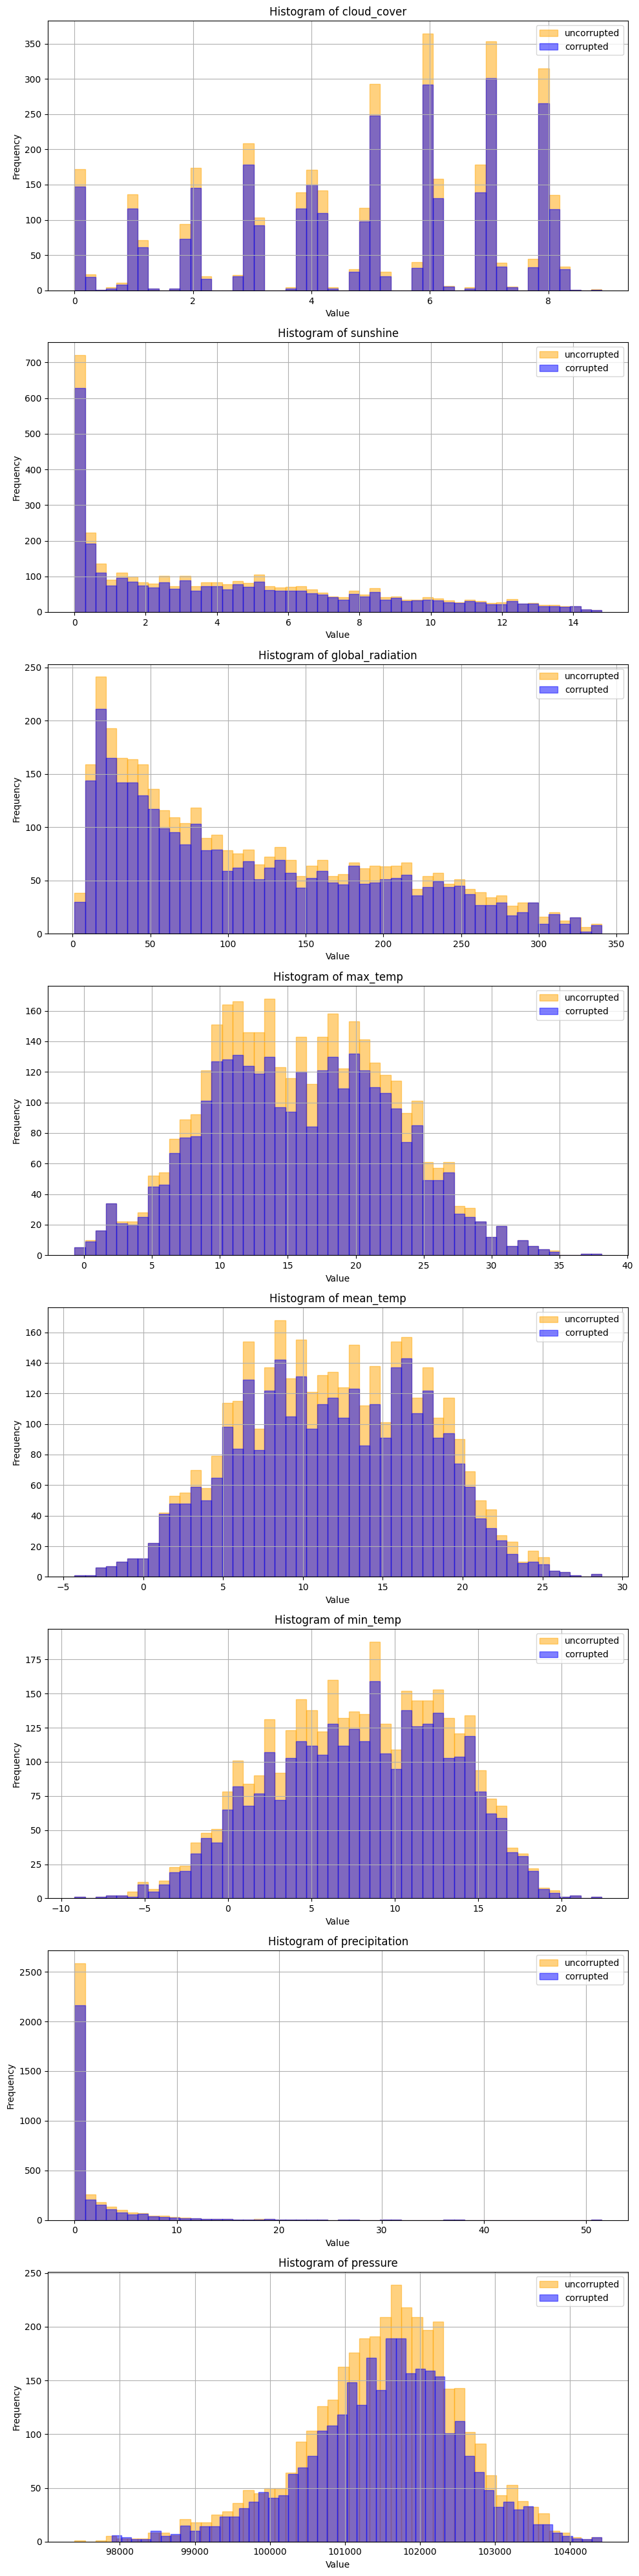

In [10]:
# Select the third 3652 rows of the dataframe to get the traing_set_2
train_uncorrupted_data2 = train_uncorrupted_data.iloc[7303:10954]
train_corrupted_data2 = train_corrupted_data.iloc[7303:10954]

# Plot time series for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    # Plot the uncorrupted data
    axes[i].hist(train_uncorrupted_data2[var], bins=50, alpha=0.5, label="uncorrupted", color="orange",edgecolor="orange")

    # Plot the corrupted data
    axes[i].hist(train_corrupted_data2[var], bins=50, alpha=0.5, label="corrupted", color="blue",edgecolor="blue")

    axes[i].set_title(f"Histogram of {var}") # Set the title of the plot
    axes[i].set_ylabel("Frequency") # Set the label of the y-axis
    axes[i].set_xlabel("Value") # Set the label of the x-axis
    axes[i].grid(True)
    axes[i].legend()

# Display the plot
plt.tight_layout()
plt.show()

### Histogram of test dataset

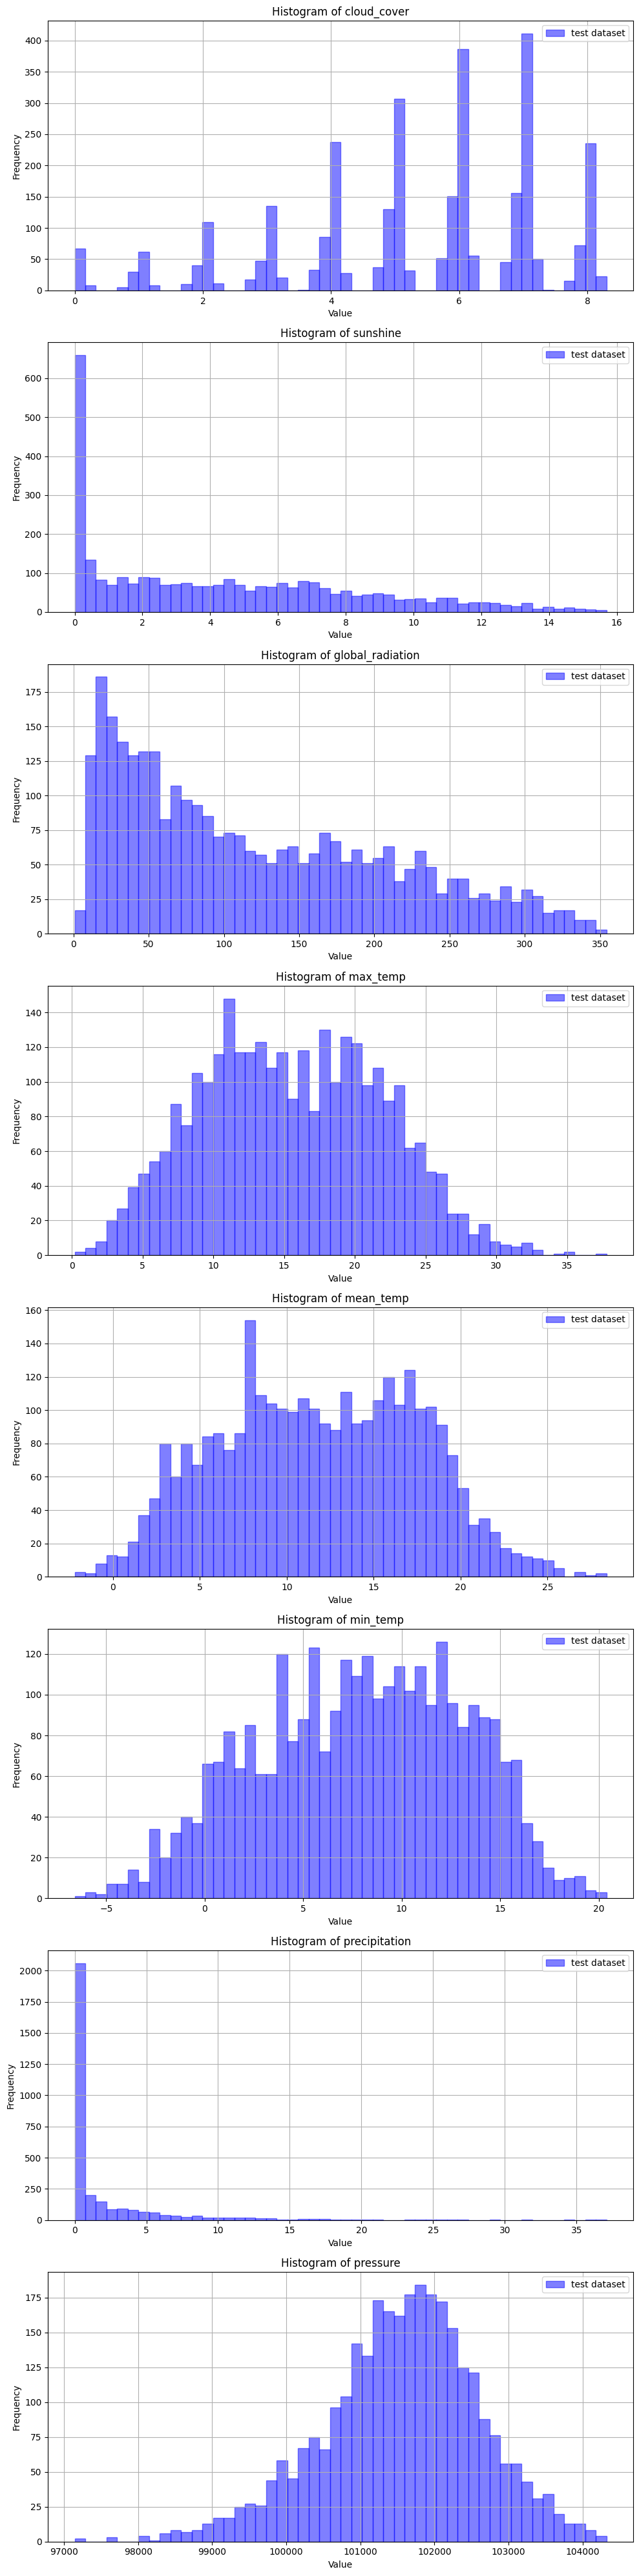

In [11]:
# Plot time series for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    # Plot the uncorrupted data
    axes[i].hist(test_set[var], bins=50, alpha=0.5, label="test dataset", color="blue",edgecolor='blue')

    axes[i].set_title(f"Histogram of {var}") # Set the title of the plot
    axes[i].set_ylabel("Frequency") # Set the label of the y-axis
    axes[i].set_xlabel("Value") # Set the label of the x-axis
    axes[i].grid(True)
    axes[i].legend()

# Display the plot
plt.tight_layout()
plt.show()

<br>

---

<br>

## **Question 2**  (25%)

Using the data loaded in **Question 1**, create a PyTorch `TensorDataset`, and create one `DataLoader` for the training set and another one for the test set.

The training loader should provide batches of weather data that have been corrupted, as well as the corresponding, paired un-corrupted batch of data. The test loader should provide batches of corrupted weather data, with no corresponding uncorrupted labels.

Using line plots, show here one batch from both the training and test datasets before and after corruption. Use different axis windows for input and label of the batch.

<br>



## Create train_loader and test_loader

In [12]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In traditional machine learning methods, we have to pre-process the data, including steps such as EDA, encoding, filling in missing values, normalization and removal of discrete values. For deep learning, we don't need to perform feature filtering, but normalisation is needed if the gap between the ranges of different features in the data is too large.

Due to excessive range gaps between different features of weather data, the largest magnitude is 1e-5 and the smallest is 1. So I used Z-score normalization to normalise the data to complete data preprocessing.(The distributions of most of the features are normal, with a small number of them being more extreme.Where time permits, they should be transformed using one of the log transformation, max-min normalisation and robust normalisation.)

In [13]:
def normalize_data(data):
    """
    Normalise the input data
    Args:
        data: Pandas DataFrame
    Returns:
        norm_data: Normalised data
        stats: Dictionary containing the mean and standard deviation of each column
    """

    # Get the columns to normalise
    columns_to_normalize = [col for col in data.columns]

    # Calculate the mean and standard deviation of each column
    means = data[columns_to_normalize].mean(skipna=True)# Calculate the mean of each column
    stds = data[columns_to_normalize].std(skipna=True)# Calculate the standard deviation of each column

    norm_data = data.copy()# Create a copy of the data

    # Normalise the data
    norm_data[columns_to_normalize] = (data[columns_to_normalize] - means) / (stds + 1e-6)

    # Return the normalised data and the statistics used for normalisation
    return norm_data, {"means": means, "stds": stds}

def apply_normalization(data, stats):
    """
    Normalise the data using the specified normalisation parameters
    Args:
        data: Pandas DataFrame
        stats: Dictionary containing the mean and standard deviation of each column
    Returns:
        norm_data: Normalised data
    """
    # Get the columns to normalise
    columns_to_normalize = [col for col in data.columns]

    # Get the statistics used for normalisation
    means = stats["means"]# Get the means
    stds = stats["stds"]# Get the standard deviations

    norm_data = data.copy()# Create a copy of the data

    # Normalise the data
    norm_data[columns_to_normalize] = (data[columns_to_normalize] - means) / (stds + 1e-6)

    # Return the normalised data
    return norm_data

In [14]:

# Normalise the training data
train_corrupted_data, train_stats = normalize_data(train_corrupted_data)  # Normalise the corrupted data
train_uncorrupted_data = apply_normalization(train_uncorrupted_data, train_stats)  # Normalise the uncorrupted data

# Convert the data to PyTorch tensors
train_corrupted_tensor = torch.tensor(train_corrupted_data.to_numpy(), dtype=torch.float32)# Convert the corrupted data to a PyTorch tensor
train_uncorrupted_tensor = torch.tensor(train_uncorrupted_data.to_numpy(), dtype=torch.float32)# Convert the uncorrupted data to a PyTorch tensor

# Create the training dataset using the TensorDataset
train_dataset = TensorDataset(train_corrupted_tensor, train_uncorrupted_tensor)  # The training dataset contains the corrupted data and the uncorrupted data

### The choice of batch_size is very important here, and I've been thinking and experimenting with this for a long time.
###I ended up setting the training set batch_size to 30 and the test set batch_size to 14. I'll explain why I chose these values later.
batch_size = 30 # batch size of the training set
test_batch_size=14 # test batch size of the test set

# Create training DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

# Normalise the test data
test_set = apply_normalization(test_set, train_stats)

# Convert the test data to a PyTorch tensor
test_tensor = torch.tensor(test_set.to_numpy(), dtype=torch.float32)

# Create the test dataset using the TensorDataset
test_dataset = TensorDataset(test_tensor)  # The test dataset contains the corrupted data

# Create test DataLoader
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

## Line plots of inputs of one batch

In [15]:
# Select the first batch from the training loader
train_batch = next(iter(train_loader))
train_inputs, train_labels = train_batch  # (corrupted data, uncorrupted data)

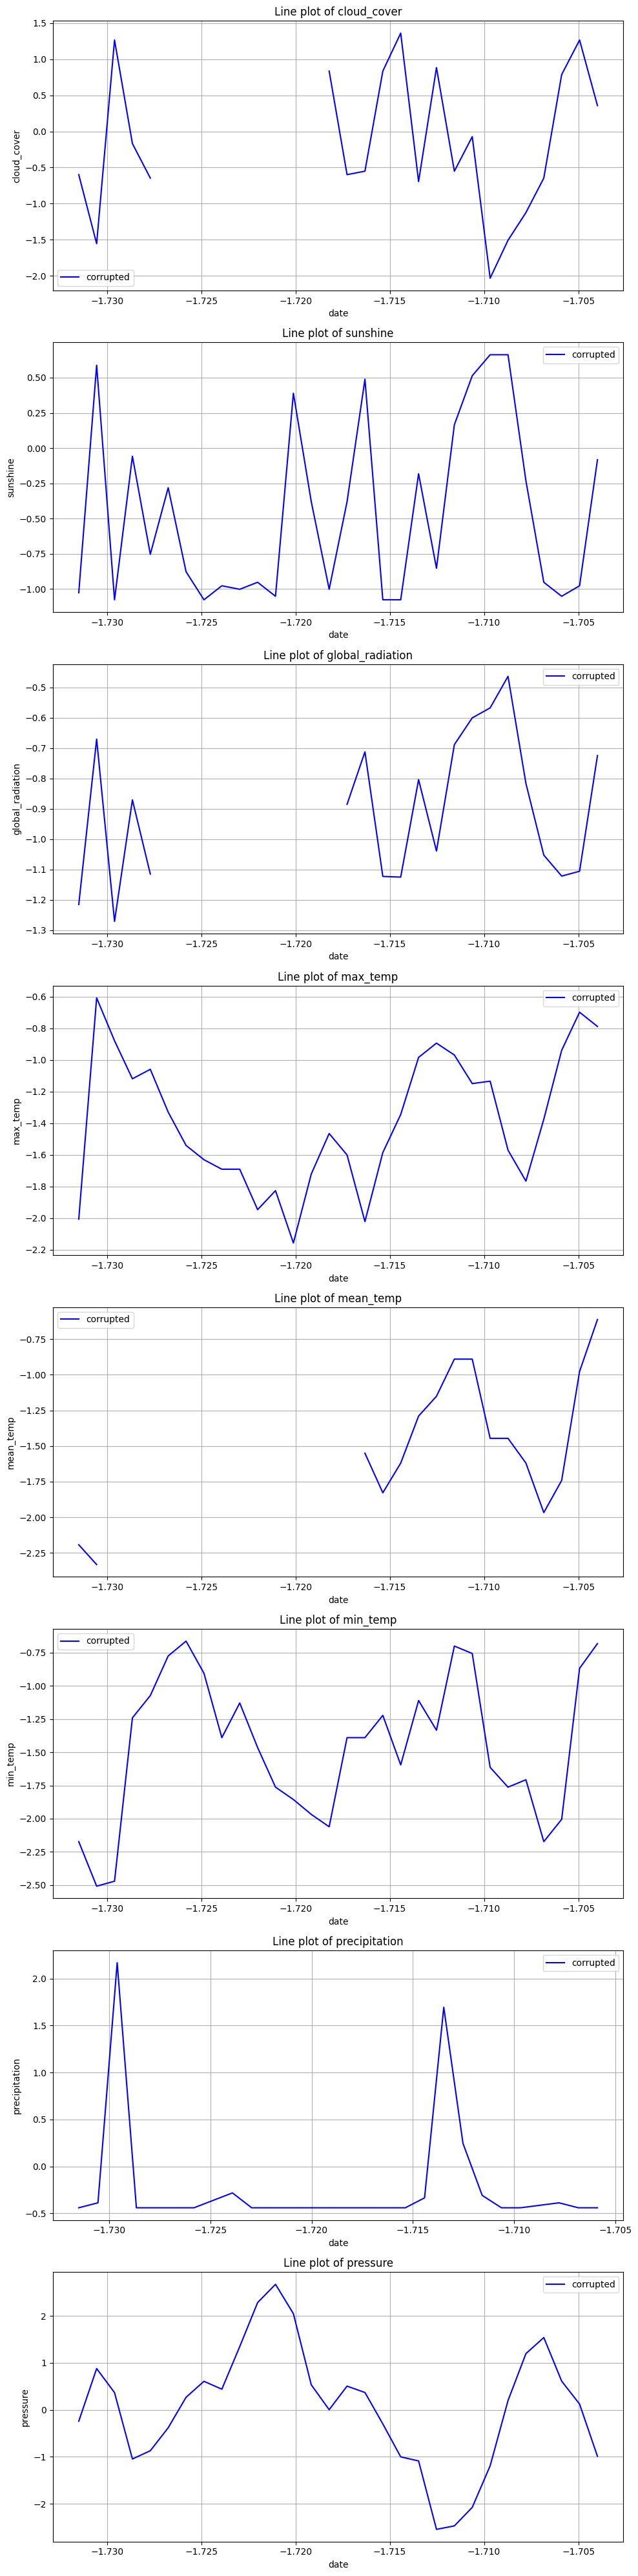

In [16]:

# Plot time series for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    axes[i].plot(train_inputs[:,0].numpy(), train_inputs[:,i+1].numpy(), label=f"corrupted", color="blue") # Plot the corrupted data
    axes[i].set_title(f"Line plot of {var}") # Set the title of the plot
    axes[i].set_ylabel(var) # Set the label of the y-axis
    axes[i].set_xlabel("date") # Set the label of the x-axis
    axes[i].grid(True)
    axes[i].legend()

# Display the plot
plt.tight_layout()
plt.show()


## Line plots of labels of one batch

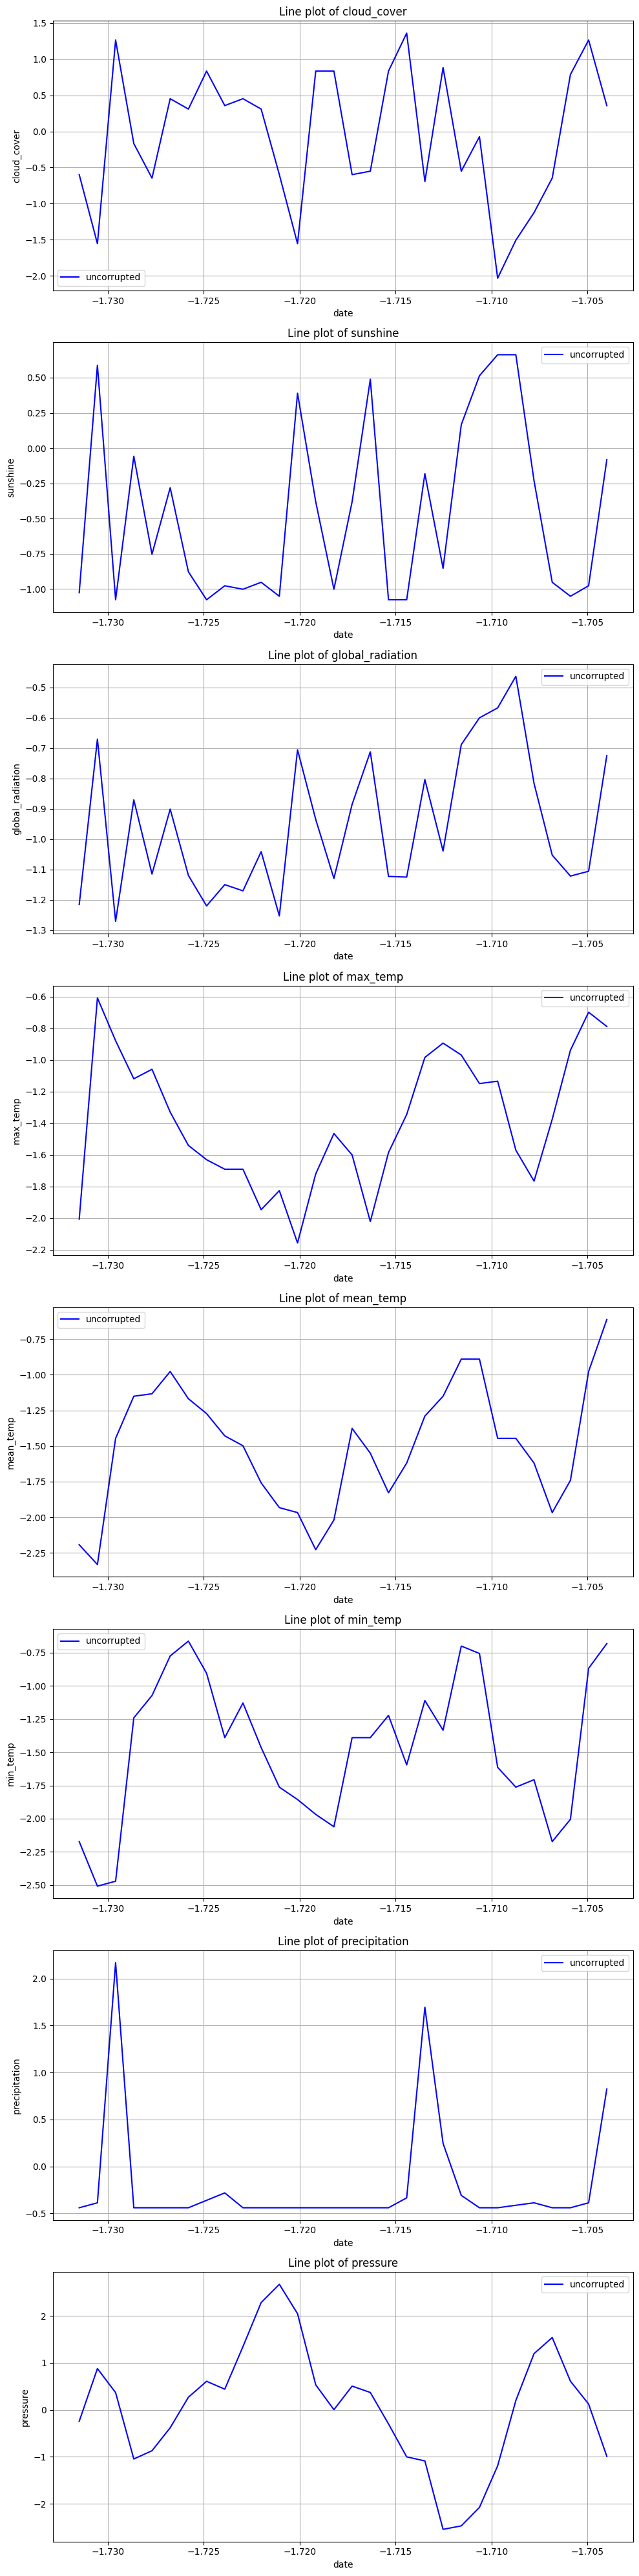

In [17]:
# Plot time series for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)), sharex=False)


for i, var in enumerate(variables):
    axes[i].plot(train_labels[:,0].numpy(), train_labels[:,i+1].numpy(), label=f"uncorrupted", color="blue") # Plot the uncorrupted data
    axes[i].set_title(f"Line plot of {var}") # Set the title of the plot
    axes[i].set_ylabel(var) # Set the label of the y-axis
    axes[i].set_xlabel("date") # Set the label of the x-axis
    axes[i].grid(True)
    axes[i].legend()

# Display the plot
plt.tight_layout()
plt.show()

## Line plots of test dataset of one batch

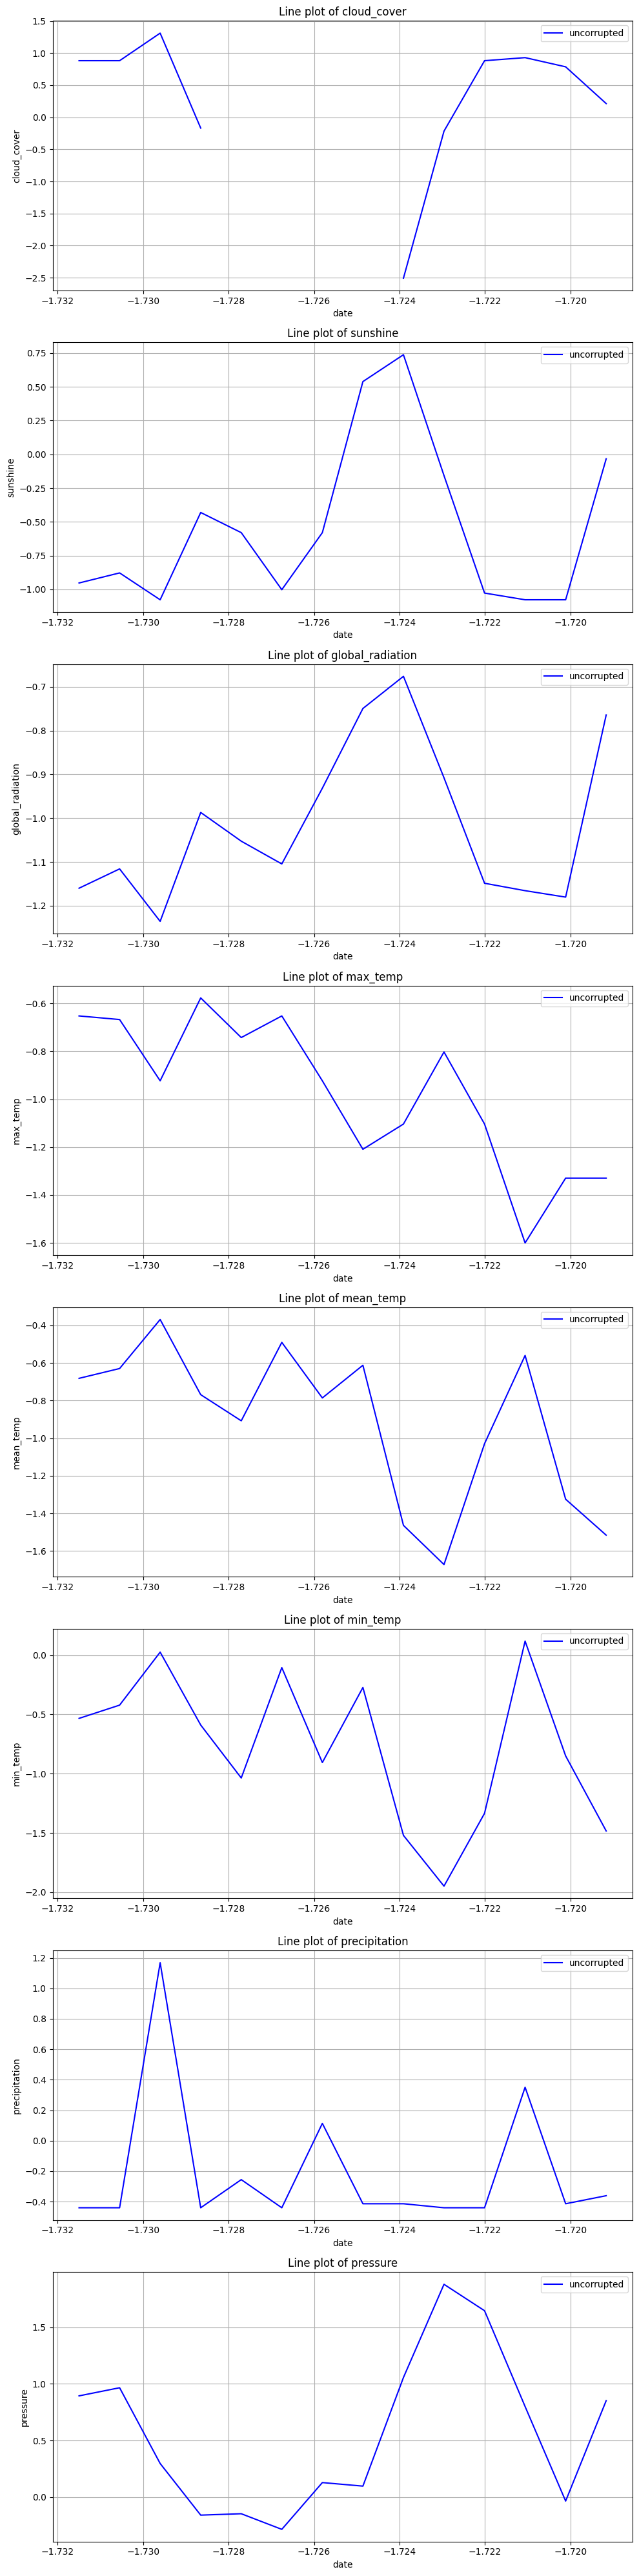

In [18]:
# Select the first batch from the test loader
test_batch = next(iter(test_loader))
test_inputs = test_batch[0]

# Plot time series for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    axes[i].plot(test_inputs[:,0].numpy(), test_inputs[:,i+1].numpy(), label=f"uncorrupted", color="blue") # Plot the test data
    axes[i].set_title(f"Line plot of {var}") # Set the title of the plot
    axes[i].set_ylabel(var) # Set the label of the y-axis
    axes[i].set_xlabel("date") # Set the label of the x-axis
    axes[i].grid(True)
    axes[i].legend()

# Display the plot
plt.tight_layout()
plt.show()

<br>

---

<br>

## **Question 3** (50%)

Using the dataset created in **Question 2**, design and train an architecture to recover the missing weather values of the provided test dataset.

Using line plots, show the test weather data with the missing values filled in using a different colour.

Additionally, save the test data with the missing values filled in into a file called `test_set_nogaps.csv` inside this repository. This file should have the same format as the original `test_set.csv` file, with the same number of rows and columns, the same row and column ordering, and the same column headings.

You have freedom to choose an architecture that you consider appropriate to solve this problem. However, you will need to train your chosen architecture as part of the assessment: **pre-trained networks are not allowed**.

You will be assessed by the quality of your predictions of the missing data values and additional marks will be given for originality in your network design choices. You should include, as part of your answer, a paragraph explaining the architecture you have chosen and any additional design choices and hyperparameters that have been important to build your solution.

This is an open-book assessment and you are encouraged to use resources online, including  tools like chatGPT. However, make sure to always mention the sources for your code and ideas, including websites, papers, and tools like chatGPT.

<br>


## Brief description

First, here is a brief description of the task and model selection.

Our goal is to fill in the missing values in the table, and since the data in the table is time-series data about the number of days, we are going to use a model that can handle time-series data, such as an RNN, LSTM and Transformer.

As a subset of them has 3651 days, which is a long time series, so I considered using the LSTM and Transformer. But because of the time limitation, I only used Transformer. And the usage of LSTM is my future work.

In [19]:
!pip install livelossplot

In [20]:
from torch.utils.data import Subset
import torch.nn as nn
from torch import Tensor
import math
import torch.nn.functional as F
import random
from livelossplot import PlotLosses

## Division of training and validation sets

Because we have to handle the time series data, so we have to use a time-based splitting method to divide the training and validation sets. Due to one sub training set including 10 years(3651/3652 days), To ensure time continuity, for each sub set, I used the first eight years of data as the training set and the last two years of data as the validation set. Here is my splitting of training and validation sets

In [21]:
# Get the whole training set
dataset = train_loader.dataset

# Divide into three sub training datasets
part1_indices = list(range(0, 3652))                         # first 3652 rows
part2_indices = list(range(3652, 3652 + 3651))               # second 3651 rows
part3_indices = list(range(3652 + 3651, 3652 + 3651 + 3651)) # third 3651 rows

# Create subsets for each part
part1_dataset = Subset(dataset, part1_indices)
part2_dataset = Subset(dataset, part2_indices)
part3_dataset = Subset(dataset, part3_indices)

# Create loaders for each part
batch_size = train_loader.batch_size  # hold the batch size
part1_loader = DataLoader(part1_dataset, batch_size=batch_size, shuffle=False) # loader for part 1
part2_loader = DataLoader(part2_dataset, batch_size=batch_size, shuffle=False) # loader for part 2
part3_loader = DataLoader(part3_dataset, batch_size=batch_size, shuffle=False) # loader for part 3

# Check the number of samples in each part
print(f"Part 1: {len(part1_dataset)} samples")
print(f"Part 2: {len(part2_dataset)} samples")
print(f"Part 3: {len(part3_dataset)} samples")

Part 1: 3652 samples
Part 2: 3651 samples
Part 3: 3651 samples


In [22]:

# Splitting the dataset into training and validation sets
def split_dataset(dataset, train_ratio=0.8):
    """
    Split the dataset into training and validation sets based on the specified ratio
    :param dataset: Original dataset
    :param train_ratio: Ratio of the training set
    :return: Training and validation sets
    """
    total_size = len(dataset) # Get the total size of the dataset
    train_size = int(total_size * train_ratio) # Calculate the size of the training set
    train_indices = list(range(0, train_size))  # Indexes of the training set
    val_indices = list(range(train_size, total_size))  # Indexes of the validation set

    # Create the training and validation sets
    train_dataset = Subset(dataset, train_indices)
    val_dataset = Subset(dataset, val_indices)

    # Return the training and validation sets
    return train_dataset, val_dataset

# Split each sub datasets into training and validation sets
part1_train, part1_val = split_dataset(part1_dataset)
part2_train, part2_val = split_dataset(part2_dataset)
part3_train, part3_val = split_dataset(part3_dataset)

# Create loaders for each part
batch_size = train_loader.batch_size  # Hold the batch size

# Part 1
part1_train_loader = DataLoader(part1_train, batch_size=batch_size, shuffle=False)
part1_val_loader = DataLoader(part1_val, batch_size=batch_size, shuffle=False)

# Part 2
part2_train_loader = DataLoader(part2_train, batch_size=batch_size, shuffle=False)
part2_val_loader = DataLoader(part2_val, batch_size=batch_size, shuffle=False)

# Part 3
part3_train_loader = DataLoader(part3_train, batch_size=batch_size, shuffle=False)
part3_val_loader = DataLoader(part3_val, batch_size=batch_size, shuffle=False)

# Check the number of samples in each part
print(f"Part 1 Train: {len(part1_train)} samples, Validation: {len(part1_val)} samples")
print(f"Part 2 Train: {len(part2_train)} samples, Validation: {len(part2_val)} samples")
print(f"Part 3 Train: {len(part3_train)} samples, Validation: {len(part3_val)} samples")

Part 1 Train: 2921 samples, Validation: 731 samples
Part 2 Train: 2920 samples, Validation: 731 samples
Part 3 Train: 2920 samples, Validation: 731 samples


## Model construction

In [23]:
# Positional Encoding
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout) # dropout layer

        position = torch.arange(max_len, dtype=torch.float32).unsqueeze(1)  # Shape the position tensor
        position = (position - position.min()) / (position.max() - position.min())  # Normalise the position tensor to [0, 1]

        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)

        # Compute the positional encoding
        pe[:, 0, 0::2] = torch.sin(position * div_term)

        # Deal with odd and even dimensions
        if d_model % 2 == 1:
            pe[:, 0, 1::2] = torch.cos(position * div_term[:-1])
        else:
            pe[:, 0, 1::2] = torch.cos(position * div_term)

        # Register the buffer
        self.register_buffer('pe', pe)

    # Forward pass
    def forward(self, x: Tensor) -> Tensor:
        """
        Arguments:
            x: Tensor, shape ``[seq_len, batch_size, embedding_dim]``
        """
        x = x + self.pe[:x.size(0)]# Add the positional encoding to the input tensor

        # Return the tensor after applying dropout
        return self.dropout(x)

# Transformer Model
class Transformer_GEN(nn.Module):

    def __init__(self, embedding_dim, hidden_size, num_layers, num_unique_words,
                 dropout, nhead, dim_feedforward):
        super().__init__()

        # Define the model parameters
        self.embedding_dim = embedding_dim # Embedding dimension
        self.hidden_size = hidden_size # Hidden size
        self.num_layers = num_layers # Number of layers
        self.num_unique_words = num_unique_words # Number of unique words
        self.dropout = dropout # Dropout rate
        self.nhead = nhead # Number of heads
        self.dim_feedforward = dim_feedforward # Dimension of the feedforward network

        self.embedding = nn.Linear(embedding_dim, hidden_size)  # Embedding layer

        self.pos_encoder = PositionalEncoding(self.hidden_size, dropout=self.dropout) # Positional encoding

        encoder_layer = nn.TransformerEncoderLayer(d_model=self.hidden_size, nhead=self.nhead,
                                                   dim_feedforward=self.dim_feedforward, dropout=self.dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=self.num_layers) # Transformer encoder

        self.h2o = nn.Linear(self.hidden_size, embedding_dim) # Output layer

    # Forward pass
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Transformer forward pass
        Args:
            x: Inputed data -- [batch_size, seq_len, embedding_dim]
        Returns:
            Tensor -- [batch_size, seq_len, embedding_dim]

        """


        # Embedding layer
        x = self.embedding(x)

        # Positional encoding
        x = self.pos_encoder(x)

        # Transformer encoder
        output = self.transformer(x)

        # # Pooling: Reduce seq_len to 1
        # output = output.mean(dim=0)  # Average pooling over seq_len -> [batch_size, embedding_dim]


        # Output layer
        return self.h2o(output)

## Model training

In [24]:
def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.enabled   = False

    return True

Model training parameters

In [25]:
seed = 42 # seed value
lr = 2e-4 # learning rate
num_epochs = 34 # number of epochs
device='cuda'

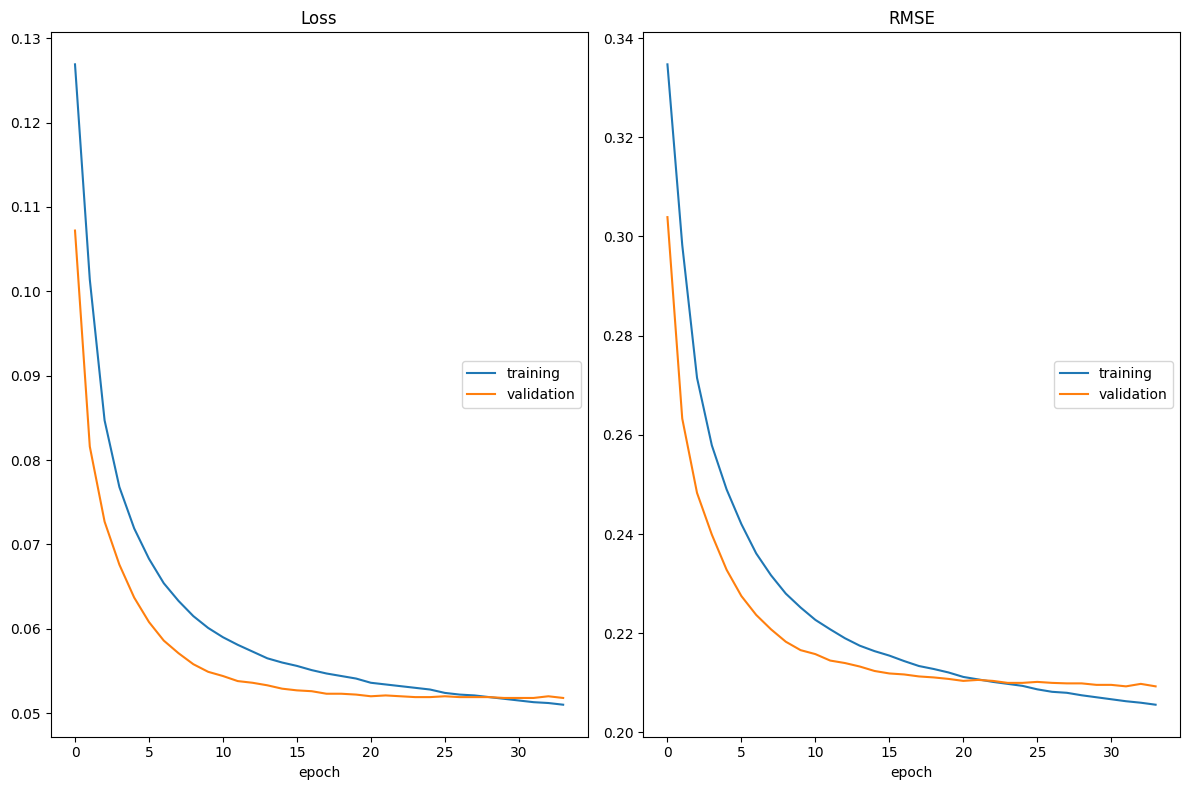

Loss
	training         	 (min:    0.051, max:    0.127, cur:    0.051)
	validation       	 (min:    0.052, max:    0.107, cur:    0.052)
RMSE
	training         	 (min:    0.206, max:    0.335, cur:    0.206)
	validation       	 (min:    0.209, max:    0.304, cur:    0.209)
Epoch 34/34, Train Loss: 0.0510, Train RMSE: 0.2056, Validation Loss: 0.0518, Validation RMSE: 0.2093


In [26]:

# Model parameters
embedding_dim = 9
hidden_size = 9
num_layers = 4
num_unique_words = 1000
dropout = 0.01
nhead = 3
dim_feedforward = 512

set_seed(seed)# Set the seed

# Instantiate the model
model = Transformer_GEN(
    embedding_dim=embedding_dim,
    hidden_size=hidden_size,
    num_layers=num_layers,
    num_unique_words=num_unique_words,
    dropout=dropout,
    nhead=nhead,
    dim_feedforward=dim_feedforward
).to(device)

# Instantiate the optimizer and loss criterion
optimizer = torch.optim.Adam(model.parameters(), lr=lr)   # instantiate the optimizer
criterion = F.mse_loss # instantiate the loss criterion

# Initialize the live plot
liveloss = PlotLosses()

# Training and validation loop
for epoch in range(num_epochs):

    logs={}

    # Training phase
    model.train()

    # Initialize the training loss and RMSE
    train_loss = 0
    train_rmse = 0

    # Use the three parts of the training set
    for part_train_loader in [part1_train_loader, part2_train_loader, part3_train_loader]:
        for inputs, targets in part_train_loader:

            #Masking mechanism: Mark the position of the missing value with a mask and fill it with a 0.
            mask = torch.isnan(inputs).to(device)  # NaN is True, valid value is False
            inputs_filled = torch.nan_to_num(inputs, nan=0.0).to(device)  # Fill NaN with 0

            # Move the target to the device
            targets = targets.to(device)

            # Clear the gradients
            optimizer.zero_grad()

            # Perform a forward pass
            outputs_missing = model(inputs_filled)

            # Generate the output before filling the missing value
            outputs=inputs_filled+outputs_missing*mask

            # Calculate the loss
            loss = criterion(outputs, targets)

            # Perform a backward pass
            loss.backward()

            # Update the weights
            optimizer.step()

            # Calculate the loss
            train_loss += loss.item()

            # Calculate RMSE
            rmse = torch.sqrt(F.mse_loss(outputs, targets))
            train_rmse += rmse.item()

    train_loss /= sum(len(loader) for loader in [part1_train_loader, part2_train_loader, part3_train_loader])
    train_rmse /= sum(len(loader) for loader in [part1_train_loader, part2_train_loader, part3_train_loader])


    logs['' + 'Loss'] = round(train_loss,4)
    logs['' + 'RMSE'] = round(train_rmse,4)

    # Validation phase
    model.eval()

    # Initialize the validation loss and RMSE
    val_loss = 0
    val_rmse = 0

    with torch.no_grad():
        for part_val_loader in [part1_val_loader, part2_val_loader, part3_val_loader]:
            for inputs, targets in part_val_loader:

                #Masking mechanism: Mark the position of the missing value with a mask and fill it with a 0.
                mask = torch.isnan(inputs).to(device)  # NaN is True, valid value is False
                inputs_filled = torch.nan_to_num(inputs, nan=0.0).to(device)  # Fill NaN with 0

                # Move the target to the device
                targets = targets.to(device)

                # Perform a forward pass
                outputs_missing = model(inputs_filled)

                # Generate the output before filling the missing value
                outputs = inputs_filled + outputs_missing * mask

                # Calculate the loss
                loss = criterion(outputs, targets)
                val_loss += loss.item()

                # Calculate RMSE
                rmse = torch.sqrt(F.mse_loss(outputs, targets))
                val_rmse += rmse.item()

    val_loss /= sum(len(loader) for loader in [part1_val_loader, part2_val_loader, part3_val_loader])
    val_rmse /= sum(len(loader) for loader in [part1_val_loader, part2_val_loader, part3_val_loader])


    logs['val_' + 'Loss'] = round(val_loss,4)
    logs['val_' + 'RMSE'] = round(val_rmse,4)

    # Update the live plot
    liveloss.update(logs)
    liveloss.draw()

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train RMSE: {train_rmse:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {val_rmse:.4f}")



After several training sessions, combining the training and validation sets, I found that the model trains best when the epoch is 34.

When the epoch is greater than 15, the validation set loss is almost constant and the test set loss keeps decreasing. When the epoch is greater than 34, the validation set loss increases and the model overfits. Therefore the epoch is chosen to be 34.

## Model prediction

In [27]:
predictions = []  # save the predictions

with torch.no_grad():
    for batch in test_loader:

        batch = batch[0]
        mask = torch.isnan(batch).to(device)  # NaN is True, valid value is False
        inputs_filled = torch.nan_to_num(batch, nan=0.0).to(device)  # Fill NaN with 0

        predicted = model(inputs_filled)  # Predict the clean images by the model
        # Pooling: Reduce seq_len to 1
        predicted = predicted.mean(dim=0)  # Average pooling over seq_len -> [batch_size, embedding_dim]

        predicted = inputs_filled + predicted * mask  # Replace the missing values with the predicted values

        predictions.append(predicted.cpu()) # Append the predictions

# Concatenate the predictions
all_predictions = torch.cat(predictions, dim=0)


In [28]:
print(all_predictions.shape)

torch.Size([3652, 9])


In [29]:
# Create a DataFrame to store the predictions
columns = ['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
           'mean_temp', 'min_temp', 'precipitation', 'pressure']

predictions_df = pd.DataFrame(all_predictions.numpy(), columns=columns)

# Display the predictions
predictions_df.head()

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0 -1.731497     0.881734 -0.952484         -1.160077 -0.652162  -0.681960   
1 -1.730549     0.881734 -0.877928         -1.115959 -0.667215  -0.629869   
2 -1.729600     1.311387 -1.076744         -1.235868 -0.923107  -0.369416   
3 -1.728651    -0.168528 -0.430594         -0.987001 -0.576900  -0.768777   
4 -1.727703    -0.169695 -0.579705         -1.052611 -0.742477  -0.907686   

   min_temp  precipitation  pressure  
0 -0.534041      -0.440089  0.893757  
1 -0.422341      -0.440089  0.965461  
2  0.024458       1.168028  0.297306  
3 -0.589891      -0.440089 -0.158124  
4 -1.036690      -0.255551 -0.145807

Since the normalisation was performed earlier, we have to perform the inverse normalisation operation

In [30]:
def denormalize_data(norm_data, stats,columns):
    """
    Denormalize the data
    Args:
        norm_data: Normalised data
        stats: Dictionary containing the mean and standard deviation of each column
    Returns:
        original_data: Denormalised data
    """
    means = stats["means"]
    stds = stats["stds"]

    # Get the columns to denormalize
    columns_to_denormalize = [col for col in columns]
    original_data = norm_data.copy()
    original_data[columns_to_denormalize] = norm_data[columns_to_denormalize] * (stds + 1e-6) + means

    return original_data

In [31]:
# Denormalize the predictions
predictions_denormalized = denormalize_data(predictions_df, train_stats,columns)

predictions_df_rounded1 = predictions_denormalized.round(4)
predictions_df_rounded1['date']=predictions_df_rounded1['date'].round().astype(int)


In [32]:
# Denormalize the test set
test_set_data = denormalize_data(test_set, train_stats,columns)

test_set_data = test_set_data.round(4)
test_set_data['date']=test_set_data['date'].round().astype(int)

In [33]:
predictions_df_rounded1.head(200)

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0       0       7.1000       0.5              15.5      11.1        7.4   
1       1       7.1000       0.8              19.4      11.0        7.7   
2       2       8.0000      -0.0               8.8       9.3        9.2   
3       3       4.9000       2.6              30.8      11.6        6.9   
4       4       4.8976       2.0              25.0      10.5        6.1   
..    ...          ...       ...               ...       ...        ...   
195   195       5.9000       0.4             110.2      17.4       14.7   
196   196       4.0000       7.2             228.9      18.2       13.5   
197   197       6.1000       7.3             239.8      22.4       13.9   
198   198       5.0000      11.9             299.0      24.6       16.3   
199   199       4.0000      11.0             281.2      25.0       18.0   

     min_temp  precipitation  pressure  
0         4.6            0.0  102472.1  
1         5.2            0.0  102547.2  
2         7.6            6.1  101847.4  
3         4.3            0.0  101370.4  
4         1.9            0.7  101383.3  
..        ...            ...       ...  
195      12.7            0.0  101061.3  
196       8.6            0.0  101625.7  
197       9.5            0.0  101987.7  
198       9.7            0.0  102072.9  
199      11.0            0.1  102004.4  

[200 rows x 9 columns]

## Line plot of filled and original of test set

First 365 days

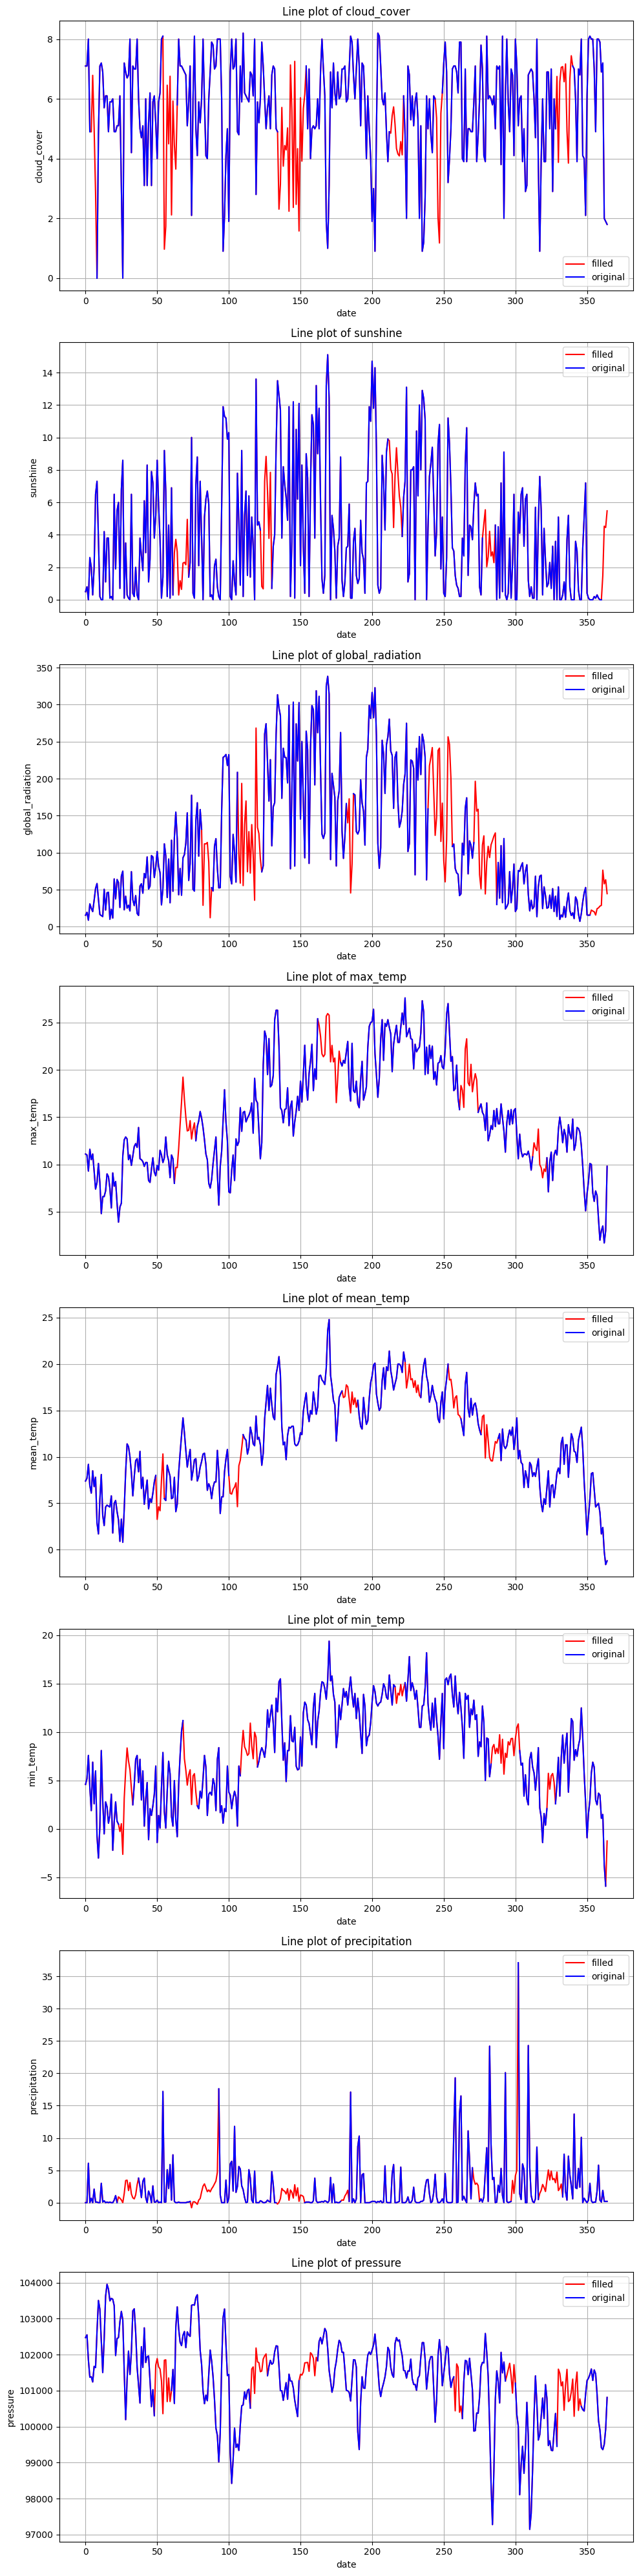

In [34]:
predictions_df_rounded1_365 = predictions_df_rounded1.head(365)
test_set_data_365 = test_set_data.head(365)

# Plot time series for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    axes[i].plot(predictions_df_rounded1_365["date"], predictions_df_rounded1_365[var], label=f"filled",color="red")
    axes[i].plot(test_set_data_365["date"], test_set_data_365[var], label=f"original", color="blue")
    axes[i].set_title(f"Line plot of {var}")
    axes[i].set_ylabel(var)
    axes[i].set_xlabel("date")
    axes[i].grid(True)
    axes[i].legend()


plt.tight_layout()
plt.show()

## Whole 3651 days

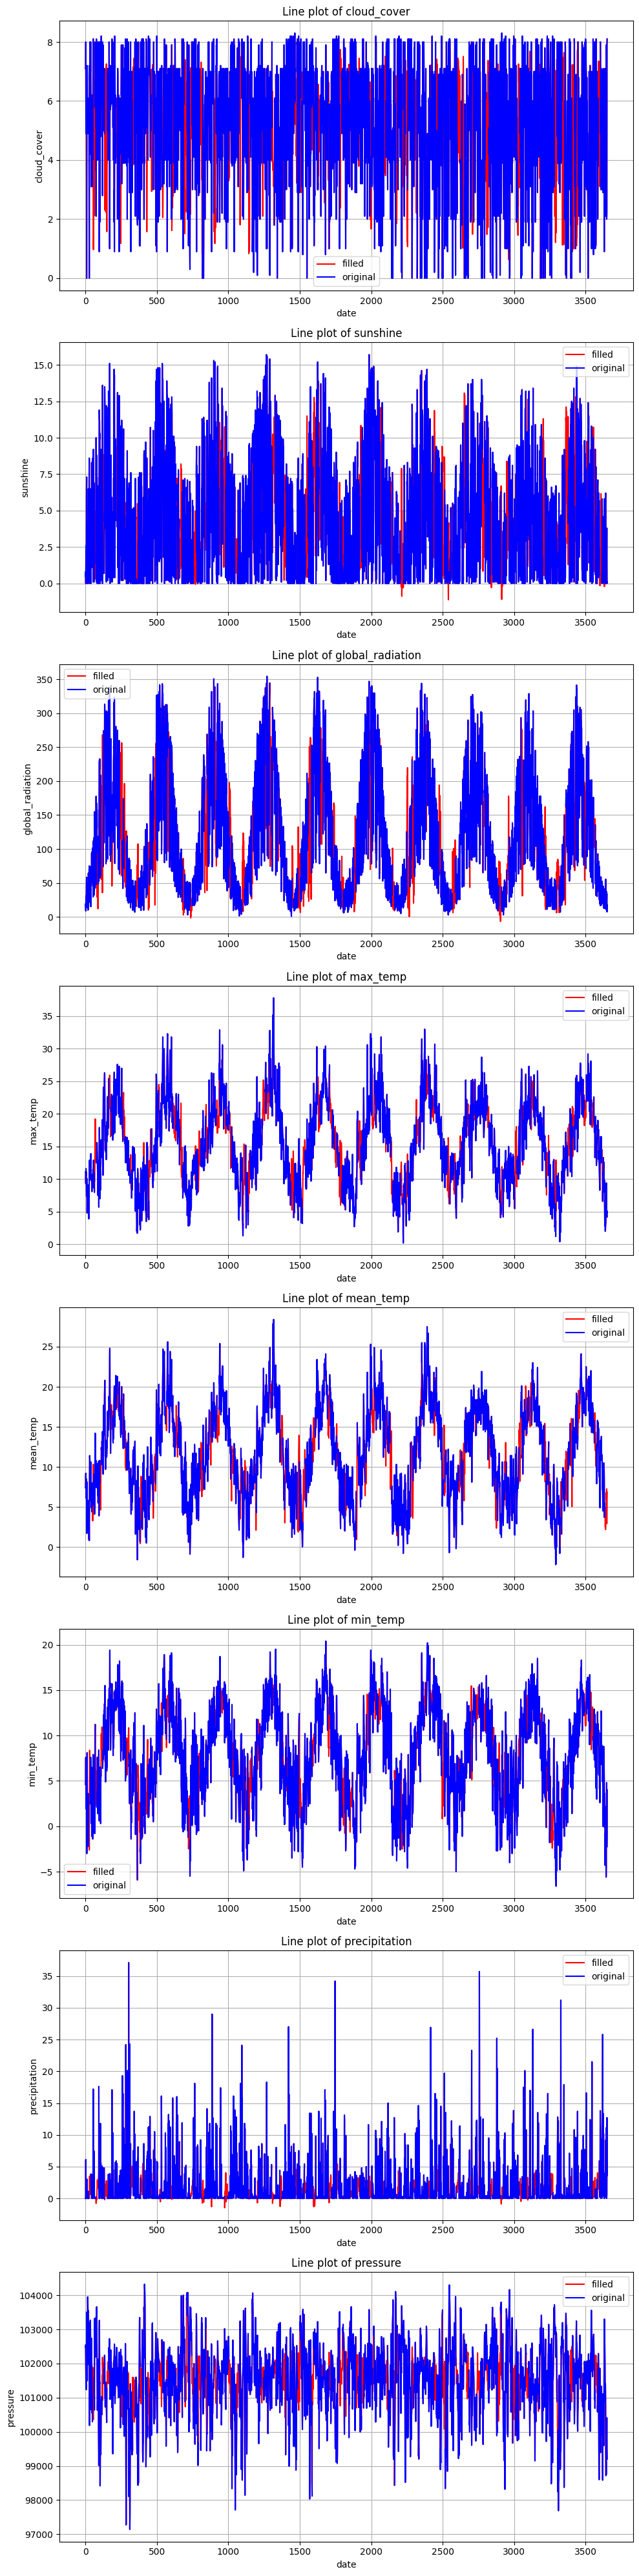

In [35]:

# Plot time series for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    axes[i].plot(predictions_df_rounded1["date"], predictions_df_rounded1[var], label=f"filled",color="red")
    axes[i].plot(test_set_data["date"], test_set_data[var], label=f"original", color="blue")
    axes[i].set_title(f"Line plot of {var}")
    axes[i].set_ylabel(var)
    axes[i].set_xlabel("date")
    axes[i].grid(True)
    axes[i].legend()


plt.tight_layout()
plt.show()

## Save the result

In [36]:
predictions_df_rounded1.to_csv('/content/drive/My Drive/acds-fay/test_set_nogaps.csv', index=False)

<br>

---

<br>